In [ ]:
import pandas as pd
import numpy as np
import os
import csv

from google.colab import drive
drive.mount('/content/drive')


all = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
problem_groups = [3,4,6,7,8,9,15]
not_problem_groups = [1,2,5,10,11,12,13,14]
stupid_groups = [3,9,15]
smart_groups = [4,6,7,8]
current_groups_to_use = all

def walk_over_directories(rootdir, files_to_use, outputfile):
  output_to_csv = []
  for dir in sorted(os.listdir(rootdir)):
    all_period_array = []
    index_errors = np.zeros(100)
    cur_lowest_errors = 100
    all_exp_periods = np.zeros(10, dtype = int)
    total_errors_on_index = np.zeros(100, dtype = int)
    #print(str(os.listdir(rootdir)))
    cur_period = dir[8:]
    if np.int(cur_period) not in files_to_use:
      continue
    for new_dir in os.listdir(rootdir + dir):
      check_group = new_dir.split("_")[1]
      if (np.int(check_group) not in current_groups_to_use ):
        continue
      Dataframe = pd.read_csv(rootdir + dir + '/' + new_dir)
      print("CURRENTLY USING " + str(new_dir))

      errors_on_index = np.zeros(100, dtype = int)
      Period_errors = np.zeros(10, dtype = int)
      Periods = Dataframe['Period'].dropna().unique()

      periods_wrong = []
      Q_diff_CORRECT = []
      Q_diff_WRONG = []
      wrong = 0
      for i in Periods:
      #for i in range(31, 101):
        cur_periodic_part = np.int(np.ceil(i/10 - 1))
        iteration = Dataframe.loc[Dataframe['Period'] == i]
        occurence_count = iteration['Occurence count'].values
        if (iteration['Real action'].values == iteration['Predicted taken'].values):
          #("EQUAL")
          Q_diff_CORRECT.append(iteration['Q-value diff'])
        else:
          #("NOT EQUAL")
          #print(str(occurence_count) + " ON PERIOD: " + str(i))
          Period_errors[cur_periodic_part] +=1
          errors_on_index[i-1] += 1
          wrong += 1 
          Q_diff_WRONG.append(iteration['Q-value diff'])
          periods_wrong.append(i)
          i = np.int(i)
          index_errors[i-1] += 1

      print(Period_errors)
      all_exp_periods += Period_errors
      total_errors_on_index += errors_on_index
      #print("MEAN Q DIFF FOR CORRECT: "  + str(np.mean(Q_diff_CORRECT)))
      #print("MEAN Q DIFF FOR WRONG: "  + str(np.mean(Q_diff_WRONG)))
      #print("TOTAL AMOUNT WRONG: " + str(wrong))
      #print("PERIODS WRONG: " + str(periods_wrong))
      if (len(periods_wrong) < cur_lowest_errors):
        cur_lowest_errors = len(periods_wrong)
      all_period_array.append(periods_wrong)
    output_to_csv.append([cur_period, total_errors_on_index, np.sum(all_exp_periods)])
  write_to_csv(outputfile, output_to_csv, ['Memory', 'Cumulated errors', 'Total errors'])
  return all_period_array, index_errors

  
def write_to_csv(outputfile, data, header):
  with open(outputfile, 'w', encoding = 'UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(data)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:


rootdir1 = ("/content/drive/MyDrive/Simulations/Opposing/")
rootdir2 = ("/content/drive/MyDrive/Simulations/Baseline/")
rootdir3 = ("/content/drive/MyDrive/Simulations/LastOppo/")
rootdir4 = ("/content/drive/MyDrive/Simulations/PredOppo/")


problem_groups = [3,4,6,7,8,9,15]
#for groupnumber in range(1,16):

walk_over_directories(rootdir1, [5,10,15,20,25,30,35], "AnalysisOpposing.csv")
walk_over_directories(rootdir2, [5,10,15,20,25,30,35], "AnalysisBaseline.csv")
walk_over_directories(rootdir3, [5,10,15,20,25,30], "AnalysisLastOppo.csv")
walk_over_directories(rootdir4, [5,10,15,20,25,30,35], "AnalysisPredOppo.csv")


CURRENTLY USING Simulation6_3_10.csv
[0 0 4 3 6 7 5 6 5 4]
CURRENTLY USING Simulation6_4_10.csv
[0 0 0 5 4 5 3 3 4 6]
CURRENTLY USING Simulation6_6_10.csv
[0 4 2 6 3 3 3 1 0 0]
CURRENTLY USING Simulation6_7_10.csv
[0 8 6 5 2 4 6 4 5 4]
CURRENTLY USING Simulation6_8_10.csv
[0 5 6 5 4 0 0 0 0 0]
CURRENTLY USING Simulation6_9_10.csv
[0 0 4 6 5 4 1 0 0 0]
CURRENTLY USING Simulation6_15_10.csv
[0 0 4 3 0 2 7 4 6 6]
CURRENTLY USING Simulation6_3_15.csv
[0 0 1 5 6 7 7 6 5 4]
CURRENTLY USING Simulation6_4_15.csv
[0 0 0 4 5 5 5 3 2 4]
CURRENTLY USING Simulation6_6_15.csv
[0 1 3 3 3 1 3 1 0 0]
CURRENTLY USING Simulation6_7_15.csv
[0 4 7 6 4 4 4 3 2 4]
CURRENTLY USING Simulation6_8_15.csv
[0 2 4 4 5 0 0 0 0 0]
CURRENTLY USING Simulation6_9_15.csv
[0 0 3 3 3 5 3 0 0 0]
CURRENTLY USING Simulation6_15_15.csv
[0 0 1 2 0 1 4 3 3 3]
CURRENTLY USING Simulation6_3_20.csv
[0 0 4 5 4 6 7 3 4 4]
CURRENTLY USING Simulation6_4_20.csv
[0 0 0 4 6 6 4 3 1 5]
CURRENTLY USING Simulation6_6_20.csv
[0 0 5 4 4 1 3 1 

([[8,
   11,
   27,
   32,
   34,
   37,
   39,
   42,
   43,
   45,
   49,
   52,
   54,
   55,
   57,
   58,
   59,
   61,
   62,
   63,
   65,
   68,
   72,
   73,
   76,
   77,
   78,
   81,
   83,
   84,
   88,
   89,
   90,
   92,
   95,
   97,
   98,
   99,
   100],
  [32,
   33,
   34,
   35,
   36,
   39,
   42,
   44,
   46,
   51,
   53,
   55,
   56,
   57,
   60,
   67,
   72,
   75,
   76,
   79,
   80,
   82,
   89,
   91,
   92,
   93,
   98,
   100],
  [6,
   8,
   12,
   17,
   18,
   19,
   20,
   21,
   24,
   25,
   32,
   34,
   35,
   42,
   43,
   46,
   47,
   57,
   58,
   67,
   68,
   74,
   77,
   89],
  [6,
   7,
   9,
   10,
   11,
   14,
   17,
   20,
   25,
   27,
   30,
   34,
   35,
   38,
   42,
   50,
   53,
   57,
   58,
   62,
   64,
   68,
   70,
   71,
   77,
   78,
   80,
   86,
   87,
   89,
   93,
   94,
   95,
   98],
  [6,
   9,
   12,
   14,
   15,
   19,
   20,
   23,
   25,
   29,
   32,
   33,
   36,
   39,
   40,
   43,
   45,
   46,
 

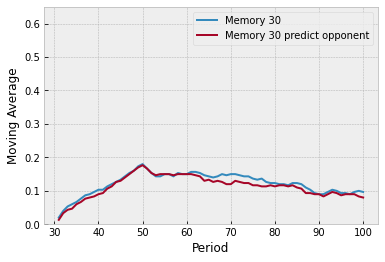

In [ ]:
import matplotlib
import matplotlib.pylab as plt
plt.style.use('bmh') 

import re

import numpy as np
from ast import literal_eval

def rolling_average_calc(array):
  N = 20
  
  '''start = 0
  mylist = array[start:29]'''
  start = 31 - N
  mylist = array[start:100]


  return_value = np.convolve(mylist, np.ones(N)/N, mode='valid')
  return return_value

  '''for i, x in enumerate(mylist, 1):
      cumsum.append(cumsum[i-1] + x)
      if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        moving_aves.append(moving_ave)
  return moving_aves'''

Dataframe = pd.read_csv("AnalysisOpposing.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

divider = len(current_groups_to_use)

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))
 
new_total_data_opposing = []
#print(len((total_data[0][0][1:-1]).split(' ')))
x_axis  = list(range(31,101))
for i in range(len(total_data)):
  ls = list(filter(None, re.split(r'[ |  |\]|\[]', total_data[i][0])))
  cleaned = [ np.int(x)/divider for x in ls]# if x.isdigit()]# else print(x) ]
  new_total_data_opposing.append(cleaned)


Dataframe = pd.read_csv("AnalysisBaseline.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

divider = len(current_groups_to_use)

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))
 
new_total_data_baseline = []
#print(len((total_data[0][0][1:-1]).split(' ')))
for i in range(len(total_data)):
  ls = list(filter(None, re.split(r'[ |  |\]|\[]', total_data[i][0])))
  cleaned = [ np.int(x)/divider for x in ls]# if x.isdigit()]# else print(x) ]
  new_total_data_baseline.append(cleaned)

Dataframe = pd.read_csv("AnalysisLastOppo.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

divider = len(current_groups_to_use)

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))
 
new_total_data_lastoppo = []
#print(len((total_data[0][0][1:-1]).split(' ')))
for i in range(len(total_data)):
  ls = list(filter(None, re.split(r'[ |  |\]|\[]', total_data[i][0])))
  cleaned = [ np.int(x)/divider for x in ls]# if x.isdigit()]# else print(x) ]
  new_total_data_lastoppo.append(cleaned)

Dataframe = pd.read_csv("AnalysisPredOppo.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

divider = len(current_groups_to_use)

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))
 
new_total_data_predoppo = []
#print(len((total_data[0][0][1:-1]).split(' ')))
for i in range(len(total_data)):
  ls = list(filter(None, re.split(r'[ |  |\]|\[]', total_data[i][0])))
  cleaned = [ np.int(x)/divider for x in ls]# if x.isdigit()]# else print(x) ]
  new_total_data_predoppo.append(cleaned)


y1 = rolling_average_calc(new_total_data_baseline[0])
y2 = rolling_average_calc(new_total_data_baseline[1])
y3 = rolling_average_calc(new_total_data_baseline[2])
y4 = rolling_average_calc(new_total_data_baseline[3])
y5 = rolling_average_calc(new_total_data_baseline[4])
y6 = rolling_average_calc(new_total_data_baseline[5])
y_fullmem_baseline = rolling_average_calc(new_total_data_baseline[6])

y7 = rolling_average_calc(new_total_data_opposing[0])
y8 = rolling_average_calc(new_total_data_opposing[1])
y9 = rolling_average_calc(new_total_data_opposing[2])
y10 = rolling_average_calc(new_total_data_opposing[3])
y11 = rolling_average_calc(new_total_data_opposing[4])
y12 = rolling_average_calc(new_total_data_opposing[5])
y_fullmem_opposing = rolling_average_calc(new_total_data_opposing[6])

y13 = rolling_average_calc(new_total_data_lastoppo[0])
y14 = rolling_average_calc(new_total_data_lastoppo[1])
y15 = rolling_average_calc(new_total_data_lastoppo[2])
y16 = rolling_average_calc(new_total_data_lastoppo[3])
y17 = rolling_average_calc(new_total_data_lastoppo[4])
y18 = rolling_average_calc(new_total_data_lastoppo[5])

y19 = rolling_average_calc(new_total_data_predoppo[0])
y20 = rolling_average_calc(new_total_data_predoppo[1])
y21 = rolling_average_calc(new_total_data_predoppo[2])
y22 = rolling_average_calc(new_total_data_predoppo[3])
y23 = rolling_average_calc(new_total_data_predoppo[4])
y24 = rolling_average_calc(new_total_data_predoppo[5])
y_fullmem_pred = rolling_average_calc(new_total_data_predoppo[6])

#payout_row = [0, 31, 24, 45, 38, 31, 38, 28, 31, 31, 38, 35, 35, 35, 38, 35, 42, 45, 38, 35, 28, 45, 48, 42, 24, 31, 34, 34, 34, 14, 37, 27, 10, 24, 38, 27, 14, 34, 34, 7, 44, 24, 28, 31, 34, 34, 41, 24, 21, 31, 28, 24, 21, 51, 41, 34, 31, 44, 28, 28, 28, 31, 28, 21, 28, 41, 38, 21, 45, 48, 42, 28, 42, 41, 45, 35, 38, 38, 35, 38, 35, 41, 38, 28, 42, 48, 42, 28, 42, 38, 48, 21, 38, 31, 38, 21, 35, 31, 42, 28, 0] 

pred_oppo = True
last_oppo = False
baseline = False
opposing = True

if (baseline == True):
  #plt.plot(x_axis, y1, label="Memory 5 Uniform")
  plt.plot(x_axis, y2, label="Memory 10 Uniform")
  plt.plot(x_axis, y3, label="Memory 15 Uniform")
  #plt.plot(x_axis, y4, label="Memory 20", alpha = 0.2)
  #plt.plot(x_axis, y5, label="Memory 25", alpha = 0.2)
  #plt.plot(x_axis, y6, label="Memory 30 Uniform")
  #plt.plot(x_axis, y_fullmem_baseline, label = "Maximum memory")

if (opposing == True):
  #plt.plot(x_axis, y7, label="Memory 5")
  #plt.plot(x_axis, y8, label="Memory 10 Uniform")
  #plt.plot(x_axis, y9, label="Memory 15 Uniform")
  #plt.plot(x_axis, y10, label="Memory 20", alpha=0.2)
  #plt.plot(x_axis, y11, label="Memory 25", alpha=0.2)
  plt.plot(x_axis, y12, label="Memory 30")
  #plt.plot(x_axis, y_fullmem_opposing, label = "Maximum memory")

if (last_oppo == True):
  plt.plot(x_axis, y13, label="Memory 5 changed beliefs")
  #plt.plot(x_axis, y14, label="Memory 10")
  #plt.plot(x_axis, y15, label="Memory 15")
  #plt.plot(x_axis, y16, label="Memory 20")
  #plt.plot(x_axis, y17, label="Memory 25")
  #plt.plot(x_axis, y18, label="Memory 30 changed beliefs")

if (pred_oppo == True):
  #plt.plot(x_axis, y19, label="Memory 5 predict opponent")
  #plt.plot(x_axis, y20, label="Memory 10")
  #plt.plot(x_axis, y21, label="Memory 15")
  #plt.plot(x_axis, y22, label="Memory 20")
  #plt.plot(x_axis, y23, label="Memory 25")
  plt.plot(x_axis, y24, label="Memory 30 predict opponent")
  #plt.plot(x_axis, y_fullmem_pred, label = "Maximum memory")


#plt.plot(x_axis, rolling_average_calc(payout_row)/70, label = "payout" )

axes = plt.gca()
axes.set_ylim([0,0.65])
#print(axes.lines[-5].get_color())

plt.plot()
plt.xlabel("Period")
plt.ylabel("Moving Average")
plt.legend()
plt.show()





In [ ]:
agents_list = [new_total_data_baseline, new_total_data_opposing, new_total_data_lastoppo, new_total_data_predoppo]
for agent in agents_list:
  print("-----------------------------------")
  for i in range(len(agent)):
    print(np.mean(agent[i][30:100]))
    #print(np.mean(agent[i][0:30]))

-----------------------------------
0.3795918367346938
0.3306122448979591
0.320408163265306
0.3040816326530611
0.2816326530612244
0.3061224489795918
0.283673469387755
-----------------------------------
0.31020408163265295
0.33673469387755095
0.2959183673469387
0.2755102040816325
0.26734693877551013
0.2897959183673468
0.27346938775510193
-----------------------------------
0.3530612244897958
0.3265306122448978
0.32448979591836724
0.3020408163265305
0.27551020408163257
0.2999999999999999
-----------------------------------
0.3142857142857142
0.3020408163265305
0.28979591836734686
0.2693877551020407
0.2775510204081632
0.2653061224489795
0.27959183673469373


[24.0, 19.533333333333335, 16.266666666666666, 13.6, 11.866666666666667, 11.133333333333333]


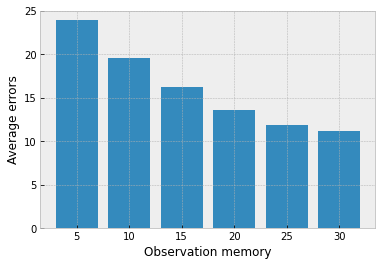

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

Dataframe = pd.read_csv("AnalysisBaseline.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Total errors']).values)))


y_values = []
for i in range(len(total_data)-1):
  y_values.append(np.int(total_data[i])/15)


x_values = ('5', '10', '15', '20', '25', '30')
y_pos = np.arange(len(x_values))

print(y_values)
# Create bars
plt.bar(y_pos, y_values)

# Create names on the x-axis
plt.xticks(y_pos, x_values)

plt.xlabel("Observation memory")
plt.ylabel("Average errors")

axes = plt.gca()
axes.set_ylim([0,25])

# Show graphic
plt.show()

['[ 8 15 19 24 23 29 19 22 13 22]']
['[ 0 17 26 33 24 25 25 18 20 20]']
['[ 0  7 19 27 26 23 26 16 12 15]']
['[ 0  0 29 31 24 21 25 12  7 15]']
['[ 0  0 14 27 28 15 22 14 12 13]']
['[ 0  0  0 31 23 22 23 14 13 16]']
0
1
2
3
4
5
[[1.1428571428571428, 2.142857142857143, 2.7142857142857144, 3.4285714285714284, 3.2857142857142856, 4.142857142857143, 2.7142857142857144, 3.142857142857143, 1.8571428571428572, 3.142857142857143], [0.0, 2.4285714285714284, 3.7142857142857144, 4.714285714285714, 3.4285714285714284, 3.5714285714285716, 3.5714285714285716, 2.5714285714285716, 2.857142857142857, 2.857142857142857], [0.0, 1.0, 2.7142857142857144, 3.857142857142857, 3.7142857142857144, 3.2857142857142856, 3.7142857142857144, 2.2857142857142856, 1.7142857142857142, 2.142857142857143], [0.0, 0.0, 4.142857142857143, 4.428571428571429, 3.4285714285714284, 3.0, 3.5714285714285716, 1.7142857142857142, 1.0, 2.142857142857143], [0.0, 0.0, 2.0, 3.857142857142857, 4.0, 2.142857142857143, 3.142857142857143, 2.

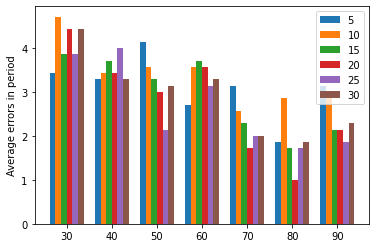

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

Dataframe = pd.read_csv("testtestopposing.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))
  print(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))


new_total_data = []
for i in range(len(total_data)):
  print(i)
  ls = total_data[i][0][2:-1].split(' ')
  cleaned = [ np.int(x)/7 for x in ls if x.isdigit() ]
  new_total_data.append(cleaned)

print(new_total_data)

labels = ['30', '40', '50', '60', '70', '80', '90']
#men_means = [20, 34, 30, 35, 27,2,2]
#women_means = [25, 32, 34, 20, 25,3,3]

x = np.arange(len(labels))  # the label locations
width = 0.75  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 5*width/12, new_total_data[0][3:11], width/6, label='5')
rects2 = ax.bar(x - 3*width/12, new_total_data[1][3:11], width/6, label='10')
rects3 = ax.bar(x - 1*width/12, new_total_data[2][3:11], width/6, label='15')
rects4 = ax.bar(x + 1*width/12, new_total_data[3][3:11], width/6, label='20')
rects5 = ax.bar(x + 3*width/12, new_total_data[4][3:11], width/6, label='25')
rects6 = ax.bar(x + 5*width/12, new_total_data[5][3:11], width/6, label='30')

# Add some text for labels, title and custom x-axis tick labels, etc.
print(new_total_data[0][3:11])
ax.set_ylabel('Average errors in period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#fig.tight_layout()

plt.show()

0
1
2
3
4
5
[[0.8571428571428571, 2.4285714285714284, 4.285714285714286, 2.857142857142857, 0.42857142857142855, 1.5714285714285714, 0.42857142857142855, 0.42857142857142855, 1.2857142857142858, 0.2857142857142857], [0.0, 3.2857142857142856, 4.142857142857143, 2.142857142857143, 0.5714285714285714, 0.42857142857142855, 1.5714285714285714, 0.5714285714285714, 0.2857142857142857, 0.0], [0.0, 2.0, 2.5714285714285716, 1.5714285714285714, 0.2857142857142857, 0.5714285714285714, 0.14285714285714285, 0.5714285714285714, 0.0, 0.2857142857142857], [0.0, 0.0, 3.0, 0.7142857142857143, 0.2857142857142857, 0.2857142857142857, 0.14285714285714285, 0.42857142857142855, 0.0, 0.2857142857142857], [0.0, 0.0, 2.4285714285714284, 0.5714285714285714, 0.0, 0.5714285714285714, 0.14285714285714285, 0.2857142857142857, 0.0, 0.14285714285714285], [0.0, 0.0, 1.2857142857142858, 0.14285714285714285, 0.2857142857142857, 0.2857142857142857, 0.42857142857142855, 0.0, 0.0]]
[2.857142857142857, 0.42857142857142855, 1.

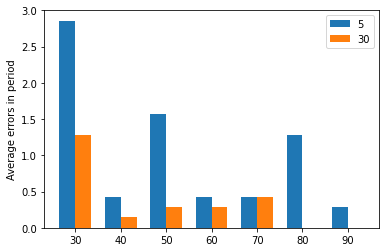

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

Dataframe = pd.read_csv("testtest.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))


new_total_data = []
for i in range(len(total_data)):
  print(i)
  ls = total_data[i][0][2:-1].split(' ')
  cleaned = [ np.int(x)/7 for x in ls if x.isdigit() ]
  new_total_data.append(cleaned)

print(new_total_data)

labels = ['30', '40', '50', '60', '70', '80', '90']
#men_means = [20, 34, 30, 35, 27,2,2]
#women_means = [25, 32, 34, 20, 25,3,3]

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, new_total_data[0][3:11], width, label='5')
rects6 = ax.bar(x + width/2, new_total_data[5][2:10], width, label='30')

# Add some text for labels, title and custom x-axis tick labels, etc.
print(new_total_data[0][3:11])
ax.set_ylabel('Average errors in period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#fig.tight_layout()

plt.show()

0
1
2
3
4
5
[[1.1428571428571428, 2.4285714285714284, 3.5714285714285716, 5.0, 4.428571428571429, 4.714285714285714, 2.7142857142857144, 3.5714285714285716, 3.142857142857143, 3.0], [0.0, 2.857142857142857, 2.857142857142857, 4.428571428571429, 4.142857142857143, 2.7142857142857144, 3.7142857142857144, 3.142857142857143, 1.7142857142857142, 3.2857142857142856], [0.0, 1.2857142857142858, 3.142857142857143, 5.571428571428571, 3.7142857142857144, 3.142857142857143, 4.142857142857143, 2.142857142857143, 1.7142857142857142, 2.0], [0.0, 0.0, 2.7142857142857144, 4.714285714285714, 4.142857142857143, 3.4285714285714284, 2.5714285714285716, 2.0, 1.8571428571428572, 2.5714285714285716], [0.0, 0.0, 1.5714285714285714, 4.142857142857143, 3.7142857142857144, 3.4285714285714284, 2.7142857142857144, 2.0, 1.2857142857142858, 2.4285714285714284], [0.0, 0.0, 0.0, 4.285714285714286, 4.428571428571429, 3.2857142857142856, 2.5714285714285716, 2.4285714285714284, 1.8571428571428572, 2.5714285714285716]]
[5.

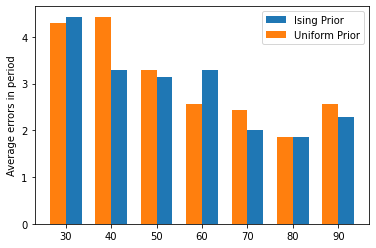

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

Dataframe = pd.read_csv("AnalysisBaseline.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))


new_total_data = []
for i in range(len(total_data)):
  print(i)
  ls = total_data[i][0][2:-1].split(' ')
  cleaned = [ np.int(x)/7 for x in ls if x.isdigit() ]
  new_total_data.append(cleaned)

print(new_total_data)

labels = ['30', '40', '50', '60', '70', '80', '90']
#labels = ['0', '10', '20']
#labels = ['0','10','20','30','40','50','60','70','80','90']
#men_means = [20, 34, 30, 35, 27,2,2]
#women_means = [25, 32, 34, 20, 25,3,3]

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

#fig, ax = plt.subplots()
#Brects1 = ax.bar(x - width/2, new_total_data[0][3:11], width, label='5')
#Brects6 = ax.bar(x + width/2, new_total_data[5][2:10], width, label='30')

# Add some text for labels, title and custom x-axis tick labels, etc.
print(new_total_data[0][3:11])
#ax.set_ylabel('Average errors in period')
#ax.set_xticks(x)
#ax.set_xticklabels(labels)
#ax.legend()

#fig.tight_layout()

Dataframe = pd.read_csv("AnalysisOpposing.csv")
rows = Dataframe['Memory'].dropna().unique()
total_data = []

for memory in sorted(rows):
  total_data.append(((((Dataframe.loc[Dataframe['Memory'] == memory])['Cumulated errors']).values)))


new_total_data_opposing = []
for i in range(len(total_data)):
  print(i)
  ls = total_data[i][0][2:-1].split(' ')
  cleaned = [ np.int(x)/7 for x in ls if x.isdigit() ]
  new_total_data_opposing.append(cleaned)

print(new_total_data_opposing)

#labels = ['30', '40', '50', '60', '70', '80', '90']
#men_means = [20, 34, 30, 35, 27,2,2]
#women_means = [25, 32, 34, 20, 25,3,3]

x = np.arange(len(labels))  # the label locations
width = 0.35 # the width of the bars

#fig, ax = plt.subplots()
fig, ax = plt.subplots()
Orects1 = ax.bar(x + width/2, new_total_data_opposing[5][3:11], width, label='Ising Prior')
Orects1 = ax.bar(x - width/2, new_total_data[5][3:11], width, label='Uniform Prior')
#Orects6 = ax.bar(x - width/2, new_total_data[5][2:10], width, label='30')

# Add some text for labels, title and custom x-axis tick labels, etc.
print(new_total_data[0][3:11])
ax.set_ylabel('Average errors in period')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
plt.show()

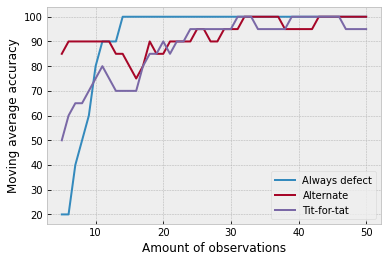

In [ ]:
import matplotlib
import matplotlib.pylab as plt
plt.style.use('bmh') 

import numpy as np

#y1 = [0.5, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
#y2 = [0.75, 1.0, 0.5, 1.0, 0.75, 0.75, 1.0, 0.75, 0.5, 1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0]
#y3 = [0.75, 0.75, 0.5, 0.5, 1.0, 0.5, 1.0, 0.5, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.75, 1.0, 0.75, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0]

y1 =  [0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y2 = [0.75, 0.75, 0.75, 1.0, 1.0, 1.0, 0.75, 0.75, 1.0, 1.0, 1.0, 0.75, 0.5, 1.0, 0.75, 0.75, 1.0, 1.0, 0.75, 0.75, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
y3 = [0.25, 0.25, 1.0, 0.5, 0.5, 0.75, 0.5, 1.0, 0.75, 0.75, 1.0, 0.25, 0.75, 0.75, 0.75, 1.0, 0.75, 1.0, 0.75, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0]

x_axis = range(5,51)
plt.plot(x_axis, np.convolve(y1, np.ones(5)/5, mode='valid')*100, label="Always defect")
plt.plot(x_axis, np.convolve(y2, np.ones(5)/5, mode='valid')*100, label="Alternate")
plt.plot(x_axis, np.convolve(y3, np.ones(5)/5, mode='valid')*100, label="Tit-for-tat")



axes = plt.gca()
#axes.set_ylim([0,1])
#print(axes.lines[-5].get_color())

plt.plot()
plt.xlabel("Amount of observations")
plt.ylabel("Moving average accuracy")
plt.legend()
plt.show()



